In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x


In [3]:
torch.manual_seed(32)
model=Model()

In [4]:
import pandas as pd
from sklearn import datasets


In [5]:
iris=datasets.load_iris()

In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
df['target']=iris.target

In [8]:
X=df.drop(['target'],axis=1).values
y=df['target'].values
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [10]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [11]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [12]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [13]:
epoch=1000
losses=[]


In [14]:
for i in range(epoch):
    i=i+1
    y_pred=model.forward(X_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100==0:
        print(i,loss)
    

100 tensor(0.8959, grad_fn=<NllLossBackward0>)
200 tensor(0.7078, grad_fn=<NllLossBackward0>)
300 tensor(0.3885, grad_fn=<NllLossBackward0>)
400 tensor(0.2048, grad_fn=<NllLossBackward0>)
500 tensor(0.1232, grad_fn=<NllLossBackward0>)
600 tensor(0.0907, grad_fn=<NllLossBackward0>)
700 tensor(0.0755, grad_fn=<NllLossBackward0>)
800 tensor(0.0669, grad_fn=<NllLossBackward0>)
900 tensor(0.0615, grad_fn=<NllLossBackward0>)
1000 tensor(0.0579, grad_fn=<NllLossBackward0>)


In [15]:
import matplotlib.pyplot as plt 

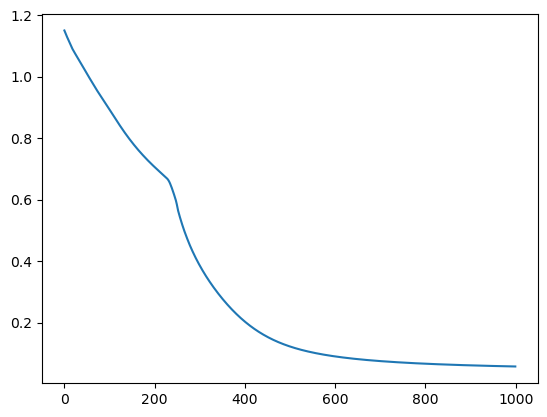

In [16]:
with torch.no_grad():
    plt.plot(range(epoch),losses)

In [17]:
correct=0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_value=model.forward(data)
        if y_value.argmax().item()==y_test[i].numpy():
#             print(i+1,y_value.argmax().item(),y_test[i].numpy())
            correct=correct+1
print("total correct prediction are ",correct)

total correct prediction are  30


In [18]:
torch.save(model.state_dict(),"my_new_iris_model_pt")

In [19]:
new_model=Model()
new_model.load_state_dict(torch.load("my_new_iris_model_pt"))

<All keys matched successfully>

In [21]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [22]:
new_model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)